# Project 5:  Semiconductor manufacturing process (Feature selection and Model Tuning)

### • PROJECT OBJECTIVE: 
- We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### DATA DESCRIPTION: 
- sensor-data.csv : (1567, 592)
- The data consists of 1567 examples each with 591 features.
- Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)


#### 1. Importing and exploring data

In [323]:
data = pd.read_csv('Signal-data.csv')

In [324]:
final = pd.read_excel('Future_predictions.xlsx')

In [325]:
data.shape

(1567, 592)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1543.0,3014.617025,73.850987,2743.2400,2966.325000,3011.49000,3057.045000,3356.3500
1,1542.0,2495.495383,80.469311,2158.7500,2452.112500,2498.97500,2538.550000,2846.4400
2,1535.0,2200.287873,29.436192,2060.6600,2180.888900,2200.98890,2217.866700,2315.2667
3,1535.0,1398.678866,442.942283,0.0000,1084.377900,1285.21440,1592.172750,3715.0417
4,1535.0,4.232053,56.684272,0.6815,1.017700,1.31680,1.529100,1114.5366
5,1535.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1535.0,101.091224,6.260266,82.1311,97.880000,101.51220,104.530000,129.2522
7,1540.0,0.121819,0.009010,0.0000,0.121100,0.12240,0.123800,0.1286
8,1547.0,1.462330,0.074042,1.1910,1.410700,1.46110,1.516600,1.6564
9,1547.0,-0.000892,0.015087,-0.0534,-0.010800,-0.00130,0.008250,0.0749


In [10]:
data.isnull().sum()

Time           18
0              24
1              25
2              32
3              32
4              32
5              32
6              32
7              27
8              20
9              20
10             20
11             20
12             20
13             21
14             21
15             21
16             21
17             21
18             21
19             28
20             18
21             20
22             20
23             20
24             20
25             20
26             20
27             20
28             20
29             20
30             20
31             20
32             19
33             19
34             19
35             19
36             19
37             19
38             19
39             19
40             42
41             42
42             19
43             19
44             19
45             19
46             19
47             19
48             19
49             19
50             19
51             19
52             19
53             22
54        

In [22]:
data.head(10)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,-0.0367,0.0014,0.9634,196.2746,0.0,8.4061,409.1399,9.8470,0.9701,186.4275,12.5222,1.4208,-5575.25,2755.50,-4149.25,-1533.50,1.3330,1.9803,7.4065,66.2000,2.9556,0.2366,3.3769,85.3498,8.6397,50.6324,64.1999,49.3676,65.3490,86.7217,117.6740,4.138,0.2003,70.0,361.8609,9.9501,143.0718,749.7516,1.2123,141.7482,1.0,646.6809,257.9247,0.0,4.632,4.908,2845.0,0.9231,0.9438,4.5554,0.4836,361.5118,10.2084,123.5555,11.7073,19.5164,26.2174,723.5343,0.9488,149.9064,1.0,634.9736,111.8165,166.6571,468.3165,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,NaN,2.4320,0.9680,1773.5327,0.2140,9242.0100,-0.0142,0.0011,-0.0002,0.0001,0.0002,-0.1808,0.0,0.1452,0.0372,0.0003,0.0001,0.0373,-0.0052,-0.0005,-0.0011,0.0002,0.1023,0.0718,NaN,NaN,NaN,NaN,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,15.87,15.84,1.0450,2.582,0.5323,3.555,-0.4258,0.7785,0.9997,2.3122,1006.4594,38.0592,92.0,63.7,28.9,74.7000,416.4299,0.3067,0.0,6.11,0.0053,0.0850,0.0518,0.0612,0.0212,13.7967,0.0,5.292,19.587,0.4062,0.0142,13.4348,0.45,0.0776,NaN,NaN,1036.0,644.0,3818.0,5475.0,0.109,0.066,0.065,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.3962,0.9807,0.1998,0.196,0.0,0.0,22.15,0.426,9.67,20.564,0.1215,4.14,0.0,16.88,52.720,0.0,0.0,0.0,0.0,0.0,0.0,0.270,5.30,20.21,0.440,8.92,17.69,5.30,6.7970,21.532,0.1299,5.95,0.0,17.69,82.523,0.0,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,NaN,0.0945,0.0097,200.1670,0.0523,765.2998,0.0,0.0196,0.0158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0053,0.0052,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0179,0.0,74.1862,0.0013,2.7930,0.0273,0.0173,0.3696,0.0,0.0,0.0,0.0,0.0,

In [24]:
data['Pass/Fail'].count()

1549

In [36]:
data.tail(19)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
1548,17-10-2008 06:07,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.479,1.4048,-5319.5,2668.0,-3951.75,-425.0,1.302,2.0085,7.3395,73.0667,2.5889,0.2021,3.386,83.3424,8.7786,50.194,64.2226,49.806,66.2251,86.4039,120.5418,80.45,2.741,70.0,362.81,10.0451,142.4364,749.5107,0.8728,134.03,1.0,639.2764,135.5562,0.0,4.594,4.823,2874.0,0.9187,0.9524,4.5479,1.8718,362.0827,10.4236,124.3082,8.5542,18.1282,23.3129,726.1978,0.9683,146.8064,1.0,633.1973,125.9159,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5935,0.1362,NaN,2.3701,0.9758,1759.9908,0.1889,7952.41,0.1756,-0.0009,-0.0009,0.0001,0.0,-0.0728,0.0,0.0291,-0.0632,0.0002,0.0,-0.1077,-0.0102,0.0008,0.0009,0.0009,0.0521,-0.0786,0.9814,102.3153,231.3263,NaN,0.9432,0.0,683.5622,0.9893,59.8578,NaN,0.9636,6.4084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,203.3,68.1,22.0,627.6799,0.1857,0.0,5.94,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,0.0351,NaN,NaN,763.0,304.0,503.0,1797.0,0.051,0.05,0.308,3.9,1.3,0.178,0.37,0.6821,0.1359,0.1841,0.3681,0.1841,0.8099,0.2183,0.465,0.0,0.0,23.35,0.718,15.74,18.859,0.1327,6.59,0.0,13.8,23.171,0.0,0.0,0.0,0.0,0.0,0.0,0.181,12.32,27.53,0.841,8.69,16.09,12.32,17.774,26.87,0.1944,14.31,0.0,25.69,96.624,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2218,0.0034,NaN,0.0658,0.0113,225.3136,0.0442,1213.0996,0.0,0.0158,0.0154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0077,0.0027,0.0,0.0,0.0,0.0,0.0024,1.5304,2.0715,NaN,0.0366,0.0,121.7717,0.0009,2.2955,NaN,0.0151,0.2669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4318,56.6312,21.1967,9.8886,193.5995,0.0642,0.0,1.8942,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0592,0.0116,NaN,NaN,346.0101,

- From looking at the dataset, it seems that there has been some errorneous entries created while filling data into Excel.
- We see that for starting 18 records, the data of Pass/fail is not maintained --> Blank
- while below, we see that after the records have ended at 1550, the values for tarhet variables have been populated for next 18 records.
- Hence, when we see the Time column, we see the null values present are 18.

- Since, we dont know thw whereabouts of this ambigious data as its not very clear if the records in the target columns have shifted below, or if these records were not supposed to be present, to be on safer side, we remove these ambigious records from our analysis.

- Hence, we drop last 18 records with data present only in Pass/fail. And we replace the 1st 18 records for which the target field is NaN with the median value.

In [68]:
final.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1,624.3145,218.3174,0,4.592,4.841,2834,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1,608.1700,84.0793,NaN,NaN,0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123,111.3,75.2,46.2000,350.6710,0.3948,0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017,967,1066,368,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0,0,20.95,0.333,12.49,16.713,0.0803,5.72,0,11.19,65.363,0,0,0,0,0,0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0,10.30,97.314,0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0,0.0744,0.0546,0,0,0,0,0,0,0,0,0,0.0027,0.0040,0,0,0,0,NaN,NaN,NaN,NaN,0.0188,0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0,0,0,0,0,0,0,0,0,0,0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0,2.5883,0.0010,0.0319,0.01

### 2. Data cleansing:
- from above observations, we'll clean the dataset and fill missing values or drop them depending on requirement.

In [326]:
data.drop(data.tail(18).index, inplace = True)

In [327]:
data.tail()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
1544,16-10-2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.0,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,81.21,1.427,70.0,369.9009,10.3149,128.6527,739.6150,1.0736,138.0482,1.0,636.6018,56.3603,0.0,4.658,4.905,2864.0,0.9204,0.9496,4.4941,2.8182,368.4282,10.7991,111.4709,9.4918,17.1818,22.4678,717.1472,0.9923,147.2109,1.0,627.1100,100.7715,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7716,0.1309,NaN,2.3762,0.9861,1869.4215,0.1804,9201.7201,0.1671,0.0002,0.0011,0.0000,0.0000,-0.0382,0.0,0.0730,0.0884,0.0000,0.0000,-0.0988,-0.0094,-0.0012,-0.0002,-0.0011,-0.0373,-0.1257,0.9833,102.0542,231.1404,NaN,0.9520,0.0,727.6761,0.9894,58.3514,NaN,0.9636,6.4295,15.69,4.947,15.73,15.67,1.541,2.454,0.8012,3.135,0.0000,0.5768,0.9975,2.2886,997.7594,41.9860,212.0,96.1,155.0,32.3999,1635.3000,0.3124,0.0,9.59,0.0019,0.1270,0.0322,0.0560,0.0247,12.6181,0.0,8.107,6.819,0.4915,0.0155,12.2102,0.23,0.0179,NaN,NaN,1280.0,334.0,7112.0,565.0,0.123,0.159,0.260,5.9,2.2,0.137,0.585,0.7184,0.0885,0.3017,0.4550,0.3017,0.6572,0.2718,0.159,0.0,0.0,23.23,0.783,13.18,14.104,0.1506,6.46,0.0,16.19,29.690,0.0,0.0,0.0,0.0,0.0,0.0,0.088,7.67,20.70,0.369,7.93,12.71,7.67,9.0119,15.915,0.1204,6.53,0.0,12.71,65.531,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1355,0.0039,NaN,0.0807,0.0027,134.6324,0.0307,526.1006,0.0,0.0122,0.0187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0050,0.0028,0.0,0.0,0.0,0.0,0.0008,2.8117,4.7703,NaN,0.0173,0.0,54.6842,0.0012,3.5114,NaN,0.0121,0.1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0856,14.205,3.3907,

In [142]:
data['Pass/Fail'].median()

-1.0

In [143]:
data[data['Pass/Fail'].isnull()].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [328]:
# creating backup copy
data_c = data

In [330]:
# 1st 18 records are present with null value wich will be replaced with median:
data['Pass/Fail'].replace(np.NaN, -1, inplace= True)

In [147]:
data['Pass/Fail'].isnull().any()

False

In [148]:
data.shape

(1549, 592)

In [149]:
data.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [150]:
# checking tha balancing of result field:
data['Pass/Fail'].value_counts()

-1.0    1449
 1.0     100
Name: Pass/Fail, dtype: int64

In [151]:
# we'll drop the columns for which SD == 0.
cols = data.select_dtypes([np.number]).columns
std = data[cols].std()
cols_to_drop = std[std==0].index
data.drop(cols_to_drop, axis=1,inplace=True)

In [153]:
data.shape

(1549, 476)

    - HERE, WE DROPPED THE COLUMNS FOR WHICH NO PARTICULAR RESULT WAS GETTING GENERDATED. NOW WE HAVE 476 COLS PRESENT WITH US.

In [331]:
#filling all empty cells with 0 - no signal 
data.fillna(0,inplace=True)

In [157]:
data['Pass/Fail'].value_counts()

-1.0    1449
 1.0     100
Name: Pass/Fail, dtype: int64

In [171]:
#replacing the target variale:

data2 = data.copy()
data2.drop(['Pass/Fail'],axis=1,inplace=True)

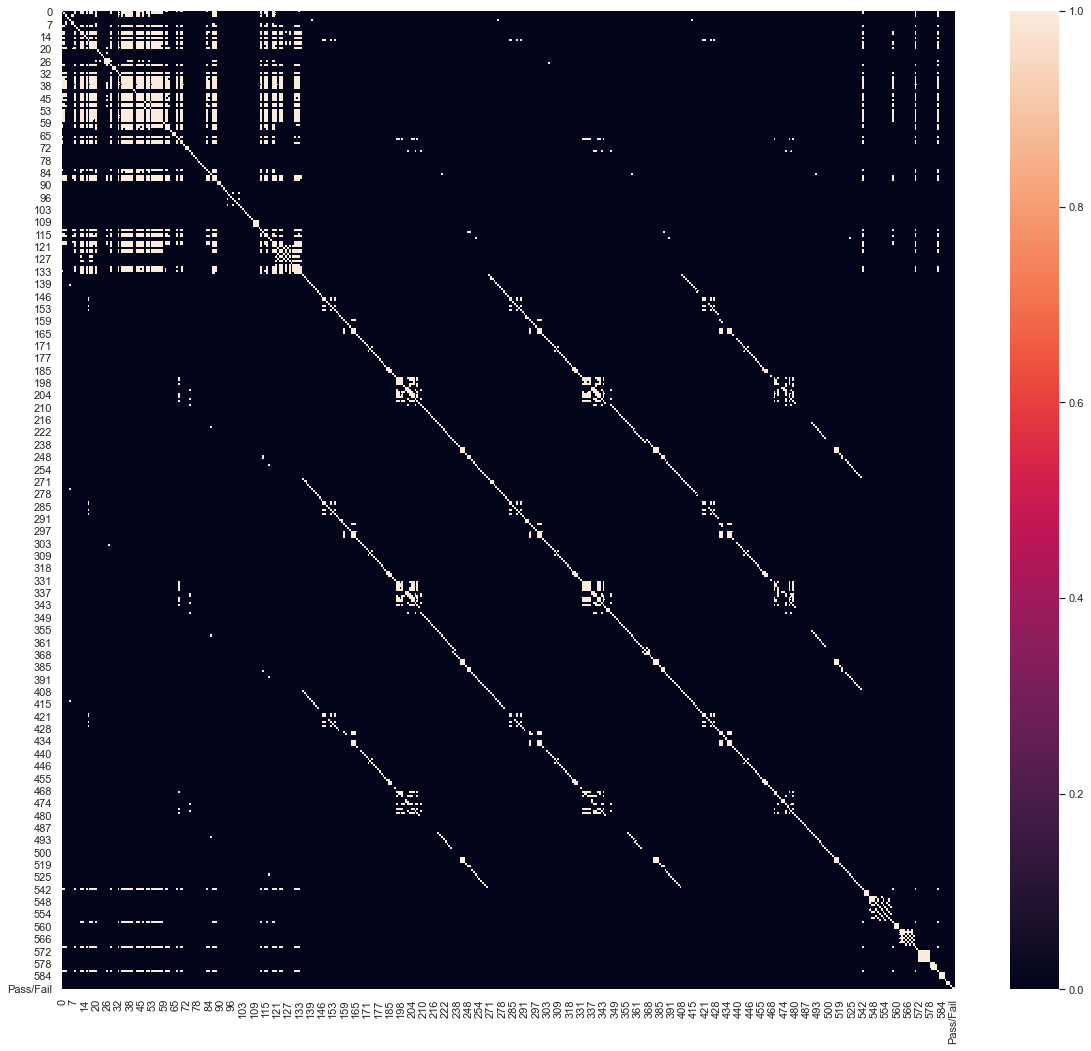

In [94]:
# now, to understand the data and depedency of columns, we have corr matrix.
plt.figure(figsize=(20,18))
corr=data.corr()
sns.heatmap(abs(corr>0.7));

In [172]:
# Creating the correlation matrix for absolute data
corr_matrix = data2.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Fill all features for deletion where correlation is greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# delete features
data2.drop(to_drop, axis=1, inplace=True)

In [173]:
data2.shape

(1549, 195)

In [168]:
data2.head()

,Time,0,1,2,3,4,8,9,10,11,14,15,16,19,20,21,23,24,25,28,29,31,32,33,36,40,41,43,44,45,47,53,59,60,62,63,64,67,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,126,129,130,134,135,136,137,138,139,142,143,144,145,146,150,151,153,155,156,157,158,159,160,161,162,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,188,195,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,250,251,253,255,267,268,269,345,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,551,558,559,562,565,570,571,572,578,582,583,586,587,589
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,1.5481,-0.0367,0.0014,0.9634,8.4061,409.1399,9.8470,12.5222,1.4208,-5575.25,-4149.25,-1533.50,1.3330,66.2000,2.9556,3.3769,85.3498,8.6397,49.3676,4.138,0.2003,361.8609,9.9501,143.0718,1.2123,4.632,0.4836,361.5118,123.5555,11.7073,19.5164,0.9488,111.8165,166.6571,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,0.0,2.4320,0.9680,1773.5327,0.2140,-0.0142,0.0011,-0.0002,0.0001,0.0002,0.0372,0.0003,0.0373,-0.0052,0.1023,0.0718,0.0,0.0000,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,2.582,-0.4258,0.7785,38.0592,92.0,63.7,28.9,74.7,416.4299,6.11,0.0053,0.0850,0.0518,0.0612,5.292,19.587,0.0142,0.45,0.0776,0.0,0.0,1036.0,644.0,3818.0,5475.0,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.9807,0.1998,0.196,22.15,0.426,9.67,20.564,0.1215,52.720,0.270,17.69,5.30,82.523,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,0.0945,0.0097,200.1670,0.0523,765.2998,0.0196,0.0158,0.0053,0.0052,0.0,0.0000,74.1862,0.0013,0.0273,0.3696,0.0322,36.442,2.3222,5.4768,141.1685,0.0000,62.9543,92.0166,357.0264,40.6015,20.4401,0.0000,151.1028,13.6881,304.7152,362.1928,307.5697,0.0000,303.9679,0.0000,143.5004,404.2105,0.0000,0.0,102.9126,0.0000,0.0,0.1096,0.0078,0.0026,1.7396,1.48,0.9553,0.6392,263.066,0.0910,532.2673,2.2820,6.00,0.0000,0.4948,0.0117,0.0184,0.0151,82.0989
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,1.5362,-0.0259,-0.0179,0.9614,13.3419,404.5667,10.1924,12.5635,1.4075,-5469.25,-4006.50,-1275.50,1.3180,65.0778,2.4556,3.4522,84.9105,8.6789,49.4900,76.900,1.2790,364.4900,9.7316,133.5982,0.8523,4.486,22.4736,361.6618,116.0718,9.9538,17.5264,1.1173,112.5148,160.6463,0.0,-0.0139,-0.0727,-0.0145,0.0025,0.0673,-0.1092,-0.0111,-0.0019,7.5953,0.1392,0.0,2.4324,0.9910,1822.7262,0.1969,0.0507,0.0043,-0.0011,-0.0001,0.0000,0.1246,0.0006,-0.0232,-0.0016,-0.0351,-0.0382,0.0,0.4675,0.9449,0.0,768.1313,0.9904,59.1313,0.6047,0.9755,6.3534,15.87,3.150,2.582,-0.4258,0.7785,38.0592,85.0,199.8,100.1,47.2,219.1620,5.57,0.0040,0.0592,0.0357,0.0390,10.423,6.511,0.0146,0.35,0.0414,0.0,0.0,906.0,380.0,3296.0,1672.0,1.8,1.4,0.132,0.554,0.9386,0.0356,0.2618,0.4391,0.8567,0.2452,0.390,16.24,0.664,15.13,23.898,0.1186,29.118,0.139,10.43,6.25,172.349,0.1560,0.0488,0.0767,0.0165,0.0811,0.0809,0.0777,0.0855,2.8763,0.0047,0.0811,0.0009,81.2722,0.0388,1386.9004,0.0166,0.0171,0.0055,0.0042,0.0,0.0283,139.9570,0.0015,0.0350,0.3200,0.0322,36.442,2.3222,8.0945,137.9710,218.1056,78.1223,82.2663,131.0858,57.0136,23.2130,27.8104,104.7844,32.1569,0.0000,67.1483,528.9655,666.6667,120.5836,74.1012,701.5801,0.0000,388.8726,0.0,349.2063,250.7463,0.0,0.1096,0.0078,0.0026,1.4598,1.33,0.9546,0.7055,0.000,0.0000,534.6455,2.0642,7.81,0.0229,0.5036,0.0169,0.0229,0.0108,47.1586
2,22-07-2008 15:30,2987.32,2528.81,0.0000,0.0000,0.0000,1.6343,-0.0263,0.0116,0.9587,11.9224,414.3060,9.7659,12.4761,1.4014,-5441.00,-5585.00,-4198.00,1.3040,67.2000,2.3889,3.3374,85.7939,8.6572,49.7927,1.434,1.7720,363.3318,9.8752,145.1145,1.2563,4.668,3.9700,365.7073,129.0845,9.8192,16.0300,0.8482,114.1296,169.1827,0.0,0.0092,-0.0080,0.0258,0.0028,0.0308,-0.0141,-0.0458,0.0520,7.4077,0.1330,0.0,2.3997,0.9907,1769.7554,0.1768,0.0390,-0.0014,-0.0002,-0.0002,0.0001,0.0084,-0

### 3. Data analysis & visualisation and Data pre-processing:
- Perform detailed relevant statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
- Segregate predictors vs target attributes
- Check for target balancing and fix it if found imbalanced.
- Perform train-test split and standardise the data or vice versa if required.
- Check if the train and test data have similar statistical characteristics when compared with original data.

In [174]:
data2.drop(columns='Time', inplace=True)
data2.tail()

,0,1,2,3,4,8,9,10,11,14,15,16,19,20,21,23,24,25,28,29,31,32,33,36,40,41,43,44,45,47,53,59,60,62,63,64,67,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,126,129,130,134,135,136,137,138,139,142,143,144,145,146,150,151,153,155,156,157,158,159,160,161,162,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,188,195,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,250,251,253,255,267,268,269,345,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,551,558,559,562,565,570,571,572,578,582,583,586,587,589
1544,2899.41,2464.36,2179.7333,3085.3781,1.4843,1.3424,-0.0045,-0.0057,0.9579,11.7692,419.3404,10.2397,12.5373,1.4072,-5418.75,-6228.25,356.00,1.2817,71.1444,2.2222,3.4680,83.8405,8.7164,49.7518,81.21,1.427,369.9009,10.3149,128.6527,1.0736,4.658,2.8182,368.4282,111.4709,9.4918,17.1818,0.9923,100.7715,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7716,0.1309,0.0000,2.3762,0.9861,1869.4215,0.1804,0.1671,0.0002,0.0011,0.0000,0.0000,0.0884,0.0000,-0.0988,-0.0094,-0.0373,-0.1257,0.9833,0.0,0.9520,0.0,727.6761,0.9894,58.3514,0.0,0.9636,6.4295,15.69,4.947,2.454,0.0000,0.5768,41.9860,212.0,96.1,155.0,32.3999,1635.3000,9.59,0.0019,0.1270,0.0322,0.0560,8.107,6.819,0.0155,0.23,0.0179,0.0,0.0,1280.0,334.0,7112.0,565.0,5.9,2.2,0.137,0.585,0.7184,0.0885,0.3017,0.4550,0.6572,0.2718,0.159,23.23,0.783,13.18,14.104,0.1506,29.690,0.088,12.71,7.67,65.531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1355,0.0039,0.0807,0.0027,134.6324,0.0307,526.1006,0.0122,0.0187,0.0050,0.0028,0.0008,0.0,54.6842,0.0012,0.0,0.1713,0.0856,14.205,3.3907,0.0000,708.6657,984.6154,68.8833,114.1894,158.7079,99.0000,52.6790,272.1613,133.9050,12.1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,53.1915,235.7895,0.0,0.1180,0.0104,0.0025,1.2960,0.80,1.0972,0.3553,264.272,0.0877,536.3418,2.0153,7.98,0.0068,0.4988,0.0143,0.0068,0.0138,203.1720
1545,3052.31,2522.55,2198.5667,1124.6595,0.8763,1.4333,-0.0061,-0.0093,0.9618,9.1620,405.8178,10.2285,12.4020,1.3949,-6408.75,-3675.50,339.00,1.0870,72.8444,2.0000,4.7088,84.0623,8.9607,49.7934,79.43,2.945,351.4055,9.7453,151.0709,0.8566,4.585,-3.3555,349.6427,127.7155,13.2491,23.3555,0.4904,131.2343,158.7832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4522,0.1371,0.0000,2.4880,0.9911,1872.5133,0.1949,-0.3570,-0.0055,0.0026,0.0000,0.0001,-0.0372,-0.0004,0.0855,-0.0116,0.0350,-0.0290,0.9824,0.0,0.9561,0.0,755.7527,0.9899,57.1020,0.0,0.9806,6.2902,15.92,1.671,2.783,-0.1419,0.8712,42.9394,88.0,235.3,219.8,59.2000,355.0260,6.86,0.0039,0.1110,0.0468,0.0571,7.625,6.953,0.0154,0.28,0.0810,0.0,0.0,504.0,94.0,315.0,367.0,2.7,0.7,0.062,0.081,0.6214,0.0961,0.4711,0.6507,0.6833,0.1082,0.414,20.52,0.580,7.24,30.347,0.0736,29.344,0.249,24.47,4.67,151.826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3349,0.0086,0.0799,0.0014,171.2301,0.1098,406.5000,0.0449,0.0223,0.0034,0.0035,0.0019,0.0,47.9077,0.0012,0.0,0.3786,0.1120,24.500,4.5432,6.1216,764.0816,612.3324,83.2242,8.5703,108.2596,35.0000,18.5401,139.1762,184.6921,28.7030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816.3636,874.5098,29.4372,700.0000,0.0,0.1120,0.0102,0.0023,0.8273,1.33,0.9671,0.3105,266.832,0.1308,537.9264,2.1814,5.48,0.0000,0.4975,0.0131,0.0068,0.0138,203.1720
1546,2978.81,2379.78,2206.3000,1110.4967,0.8236,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.4555,1.4256,-5153.25,-4102.00,-1226.00,1.2930,71.2667,2.2333,3.4912,85.8638,8.1728,49.0667,82.03,2.863,350.3145,9.9572,134.8609,1.3337,4.596,1.1664,348.5336,116.0273,10.6773,18.8336,0.9078,97.2315,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7772,0.1326,0.1119,2.4590,0.9869,1820.3629,0.1580,-0.0223,0.0034,-0.0001,-0.0002,0.0000,-0.0177,-0.0001,0.0022,-0.0142,-0.0978,0.0486,0.9839,0.0,0.9488,0.0,704.2686,0.9891,59.2046,0.0,0.9767,6.2790,0.00,0.000,0.000,0.0000,0.0000,0.0000,85.0,146.9,134.0,73.4001,300.2620,7.59,0.0043,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.29,0.0467,0.0,

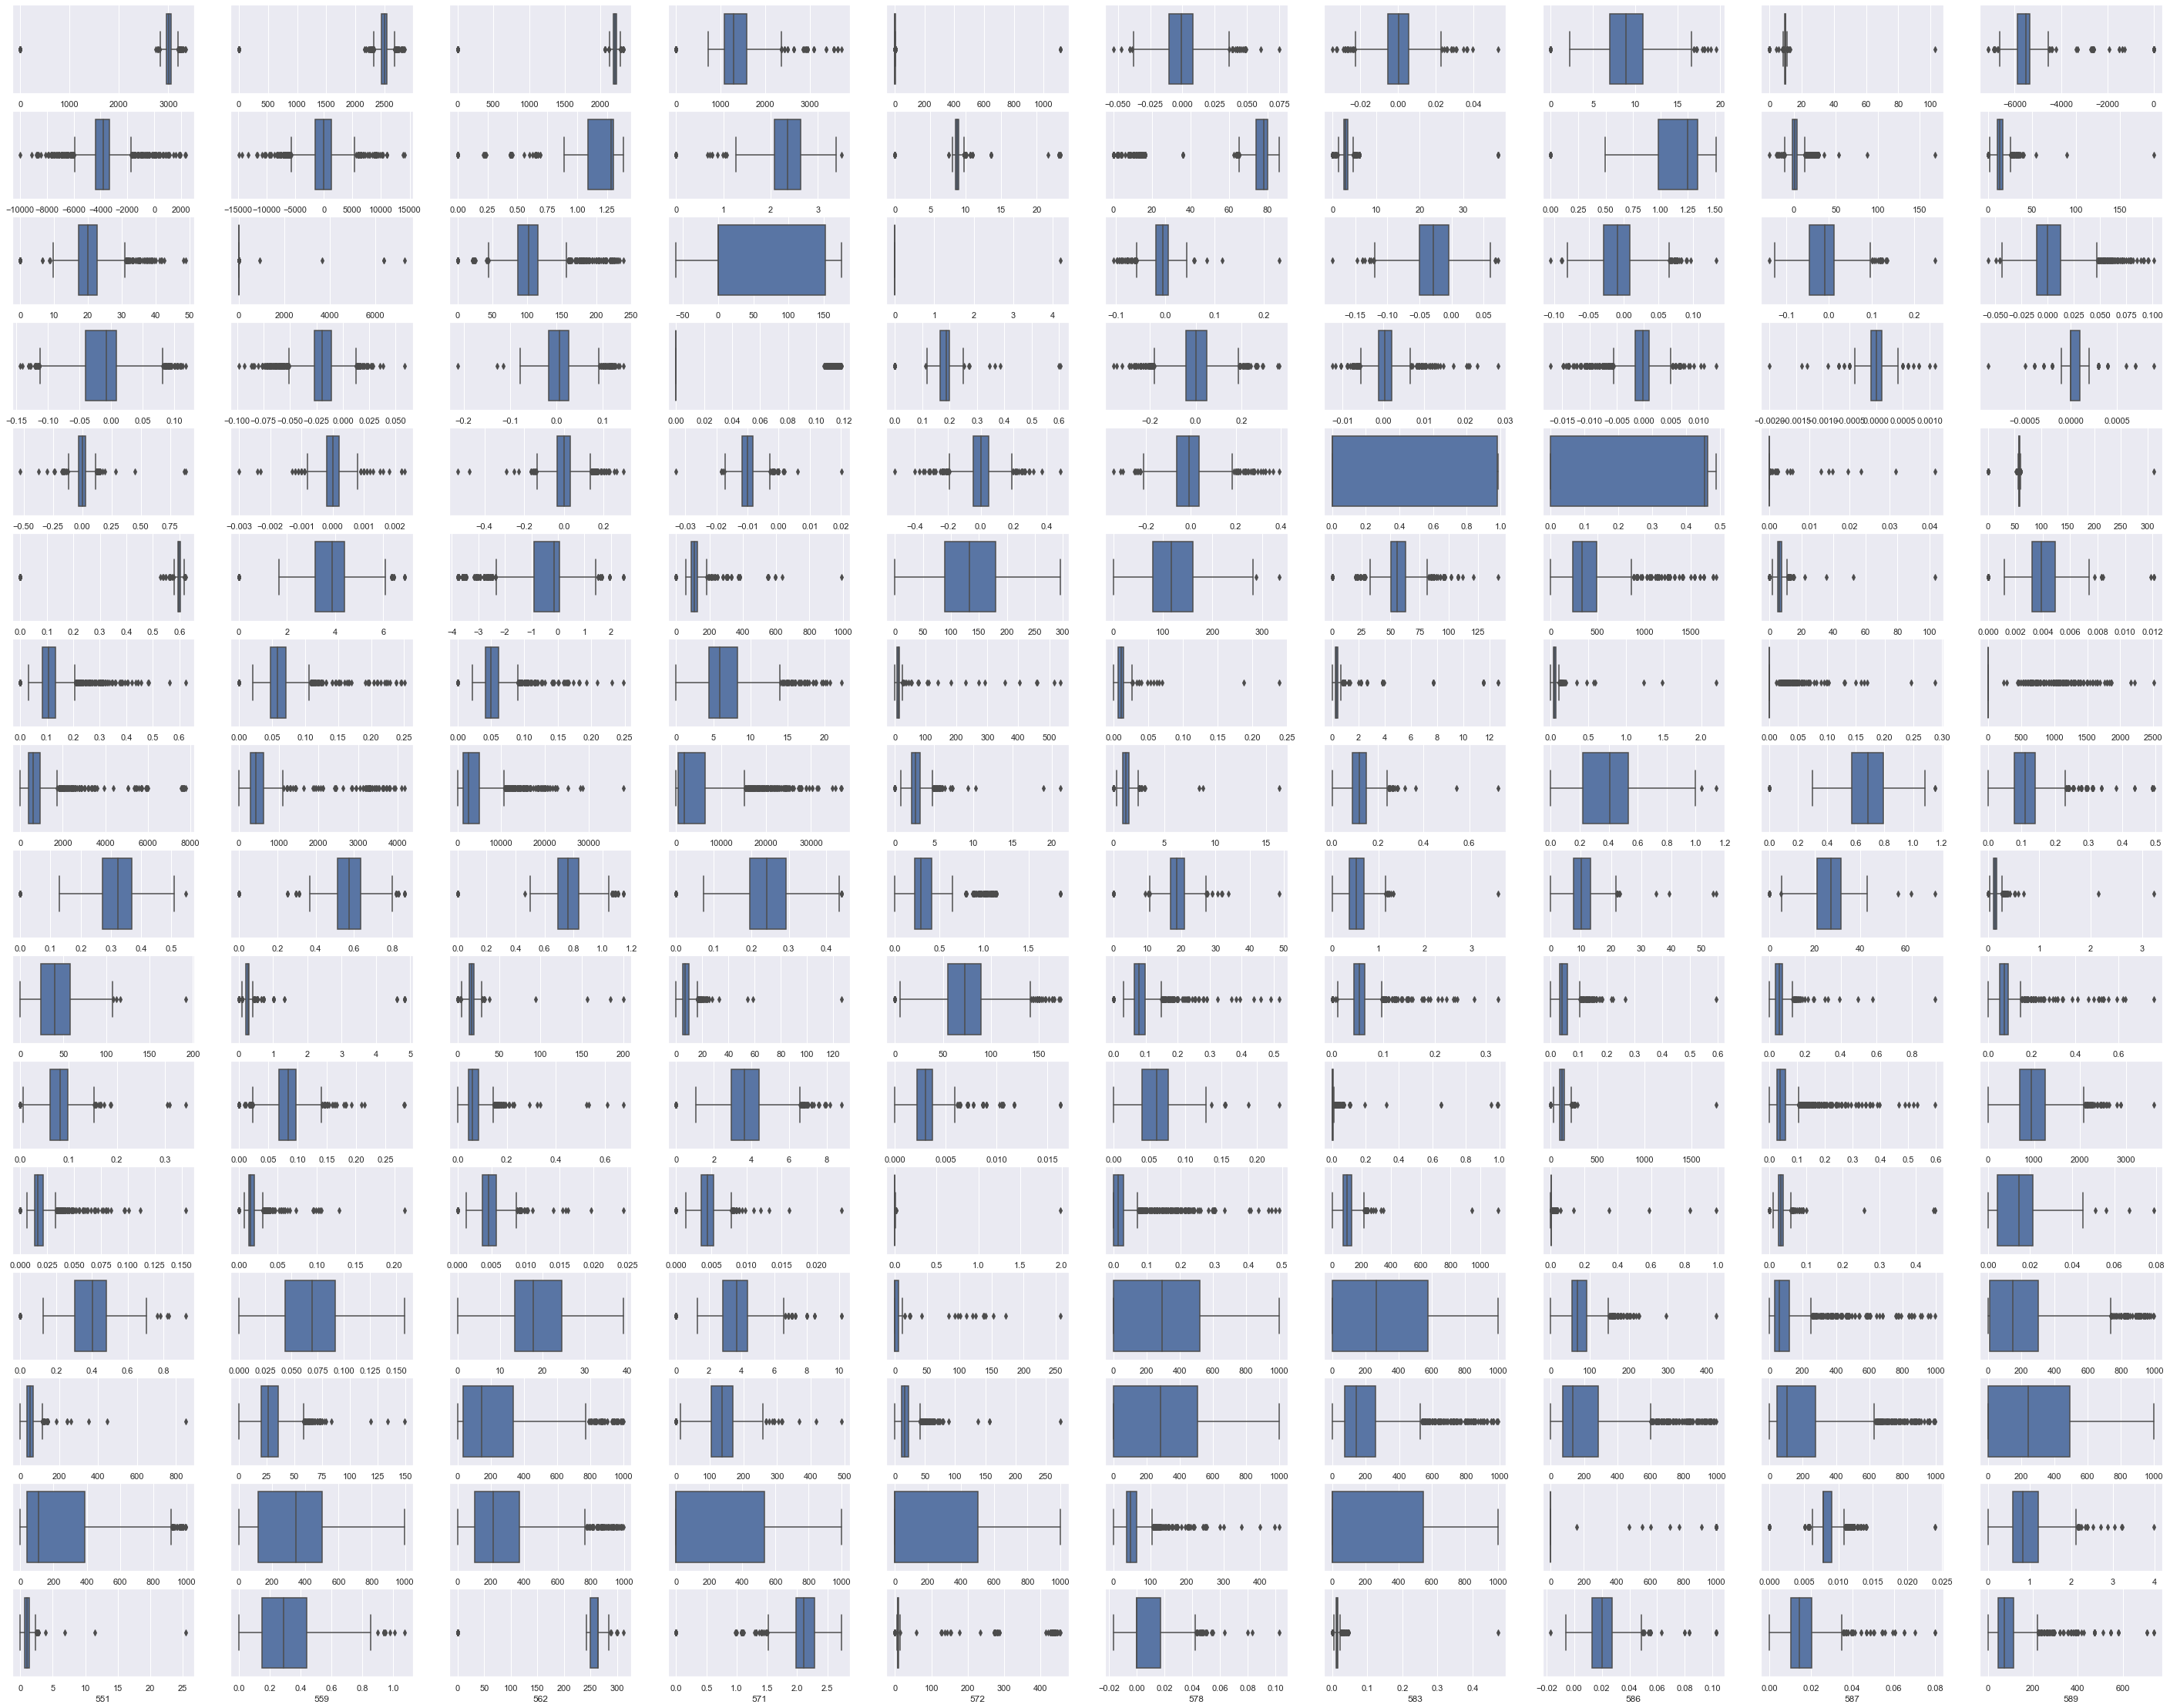

In [116]:
# Usually, I start with pariplot to see the relations between the cols, but since we have huge number of attributes, 
# we'll start with box plot to analyse the outliers, and treat them, if any

plt.figure(figsize=(50, 50))
col = 1
for i in data2.columns:
    plt.subplot(20,10, col)
    sns.boxplot(data2[i])
    col += 1

In [175]:
# we can see many outliers present in the above graph.
# we'll use the IQR to treat the outliers:

for i in data2.columns:
    q1 = data2[i].quantile(0.25)
    q3 = data2[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data2.loc[(data2[i] < low) | (data2[i] > high), i] = data2[i].median()

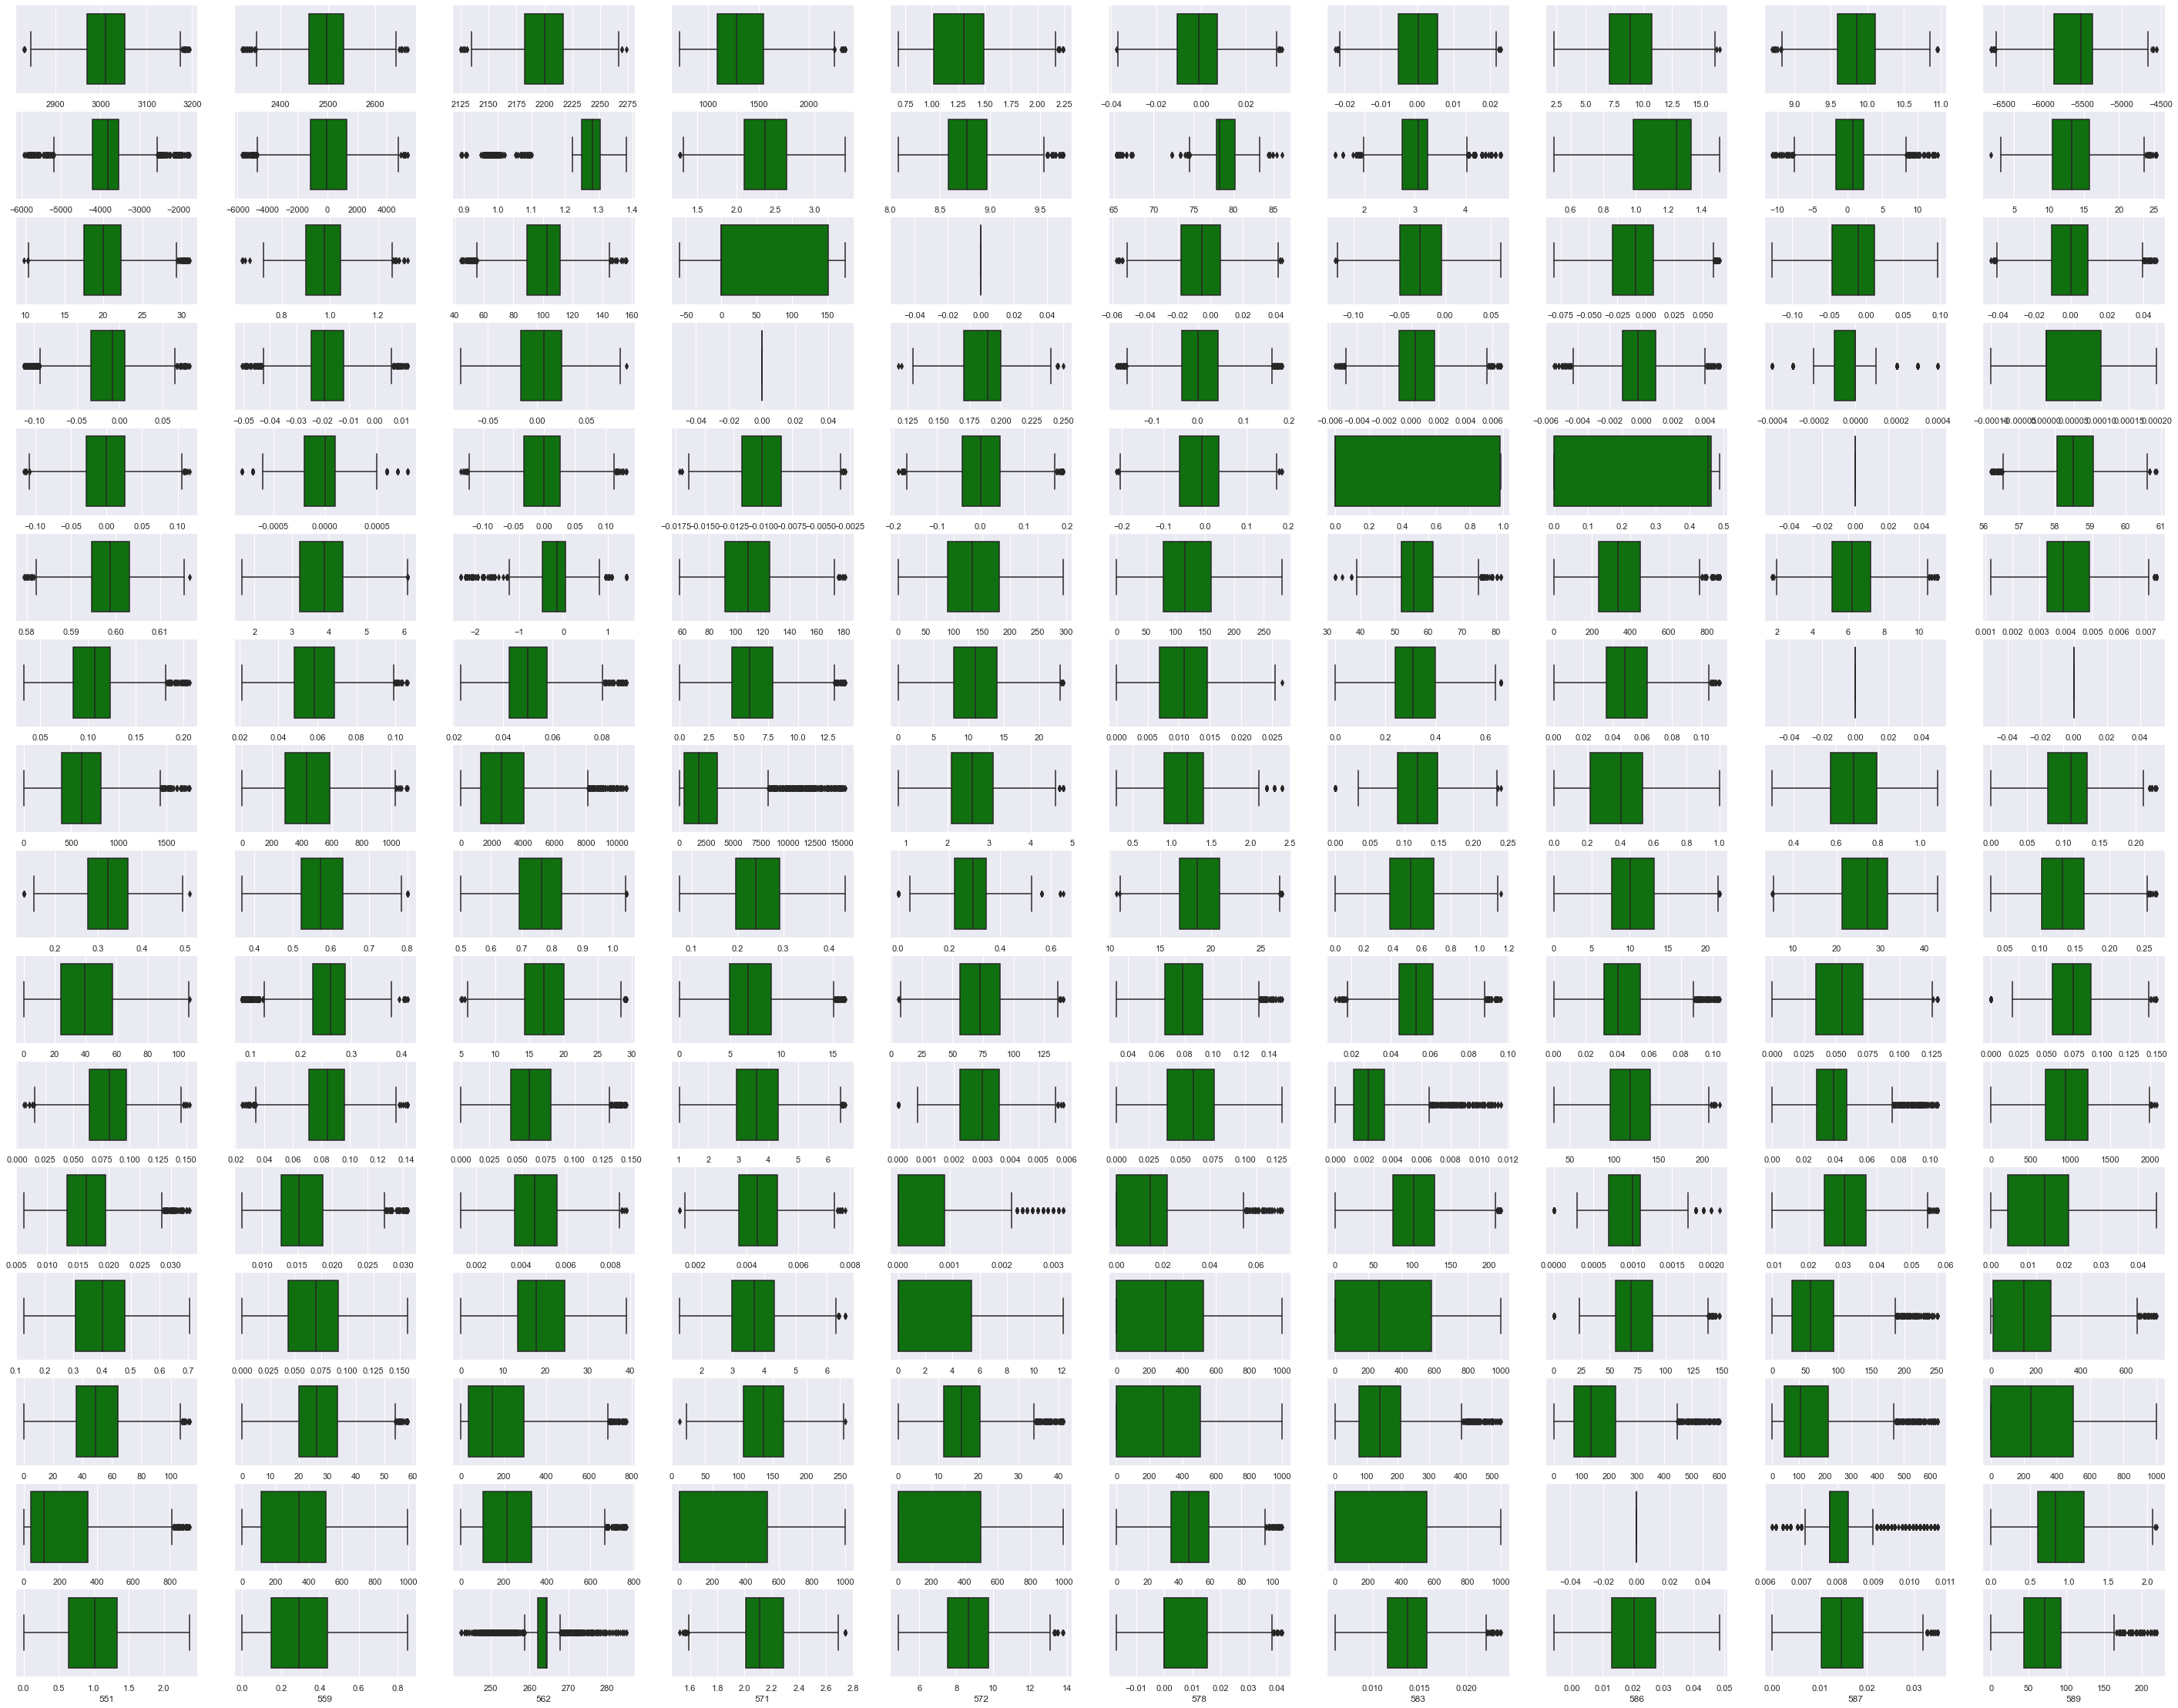

In [122]:
# again plotting the boxplot to see the treated values:
plt.figure(figsize=(50, 50))
col = 1
for i in data2.columns:
    plt.subplot(20,10, col)
    sns.boxplot(data2[i],color='green')
    col += 1

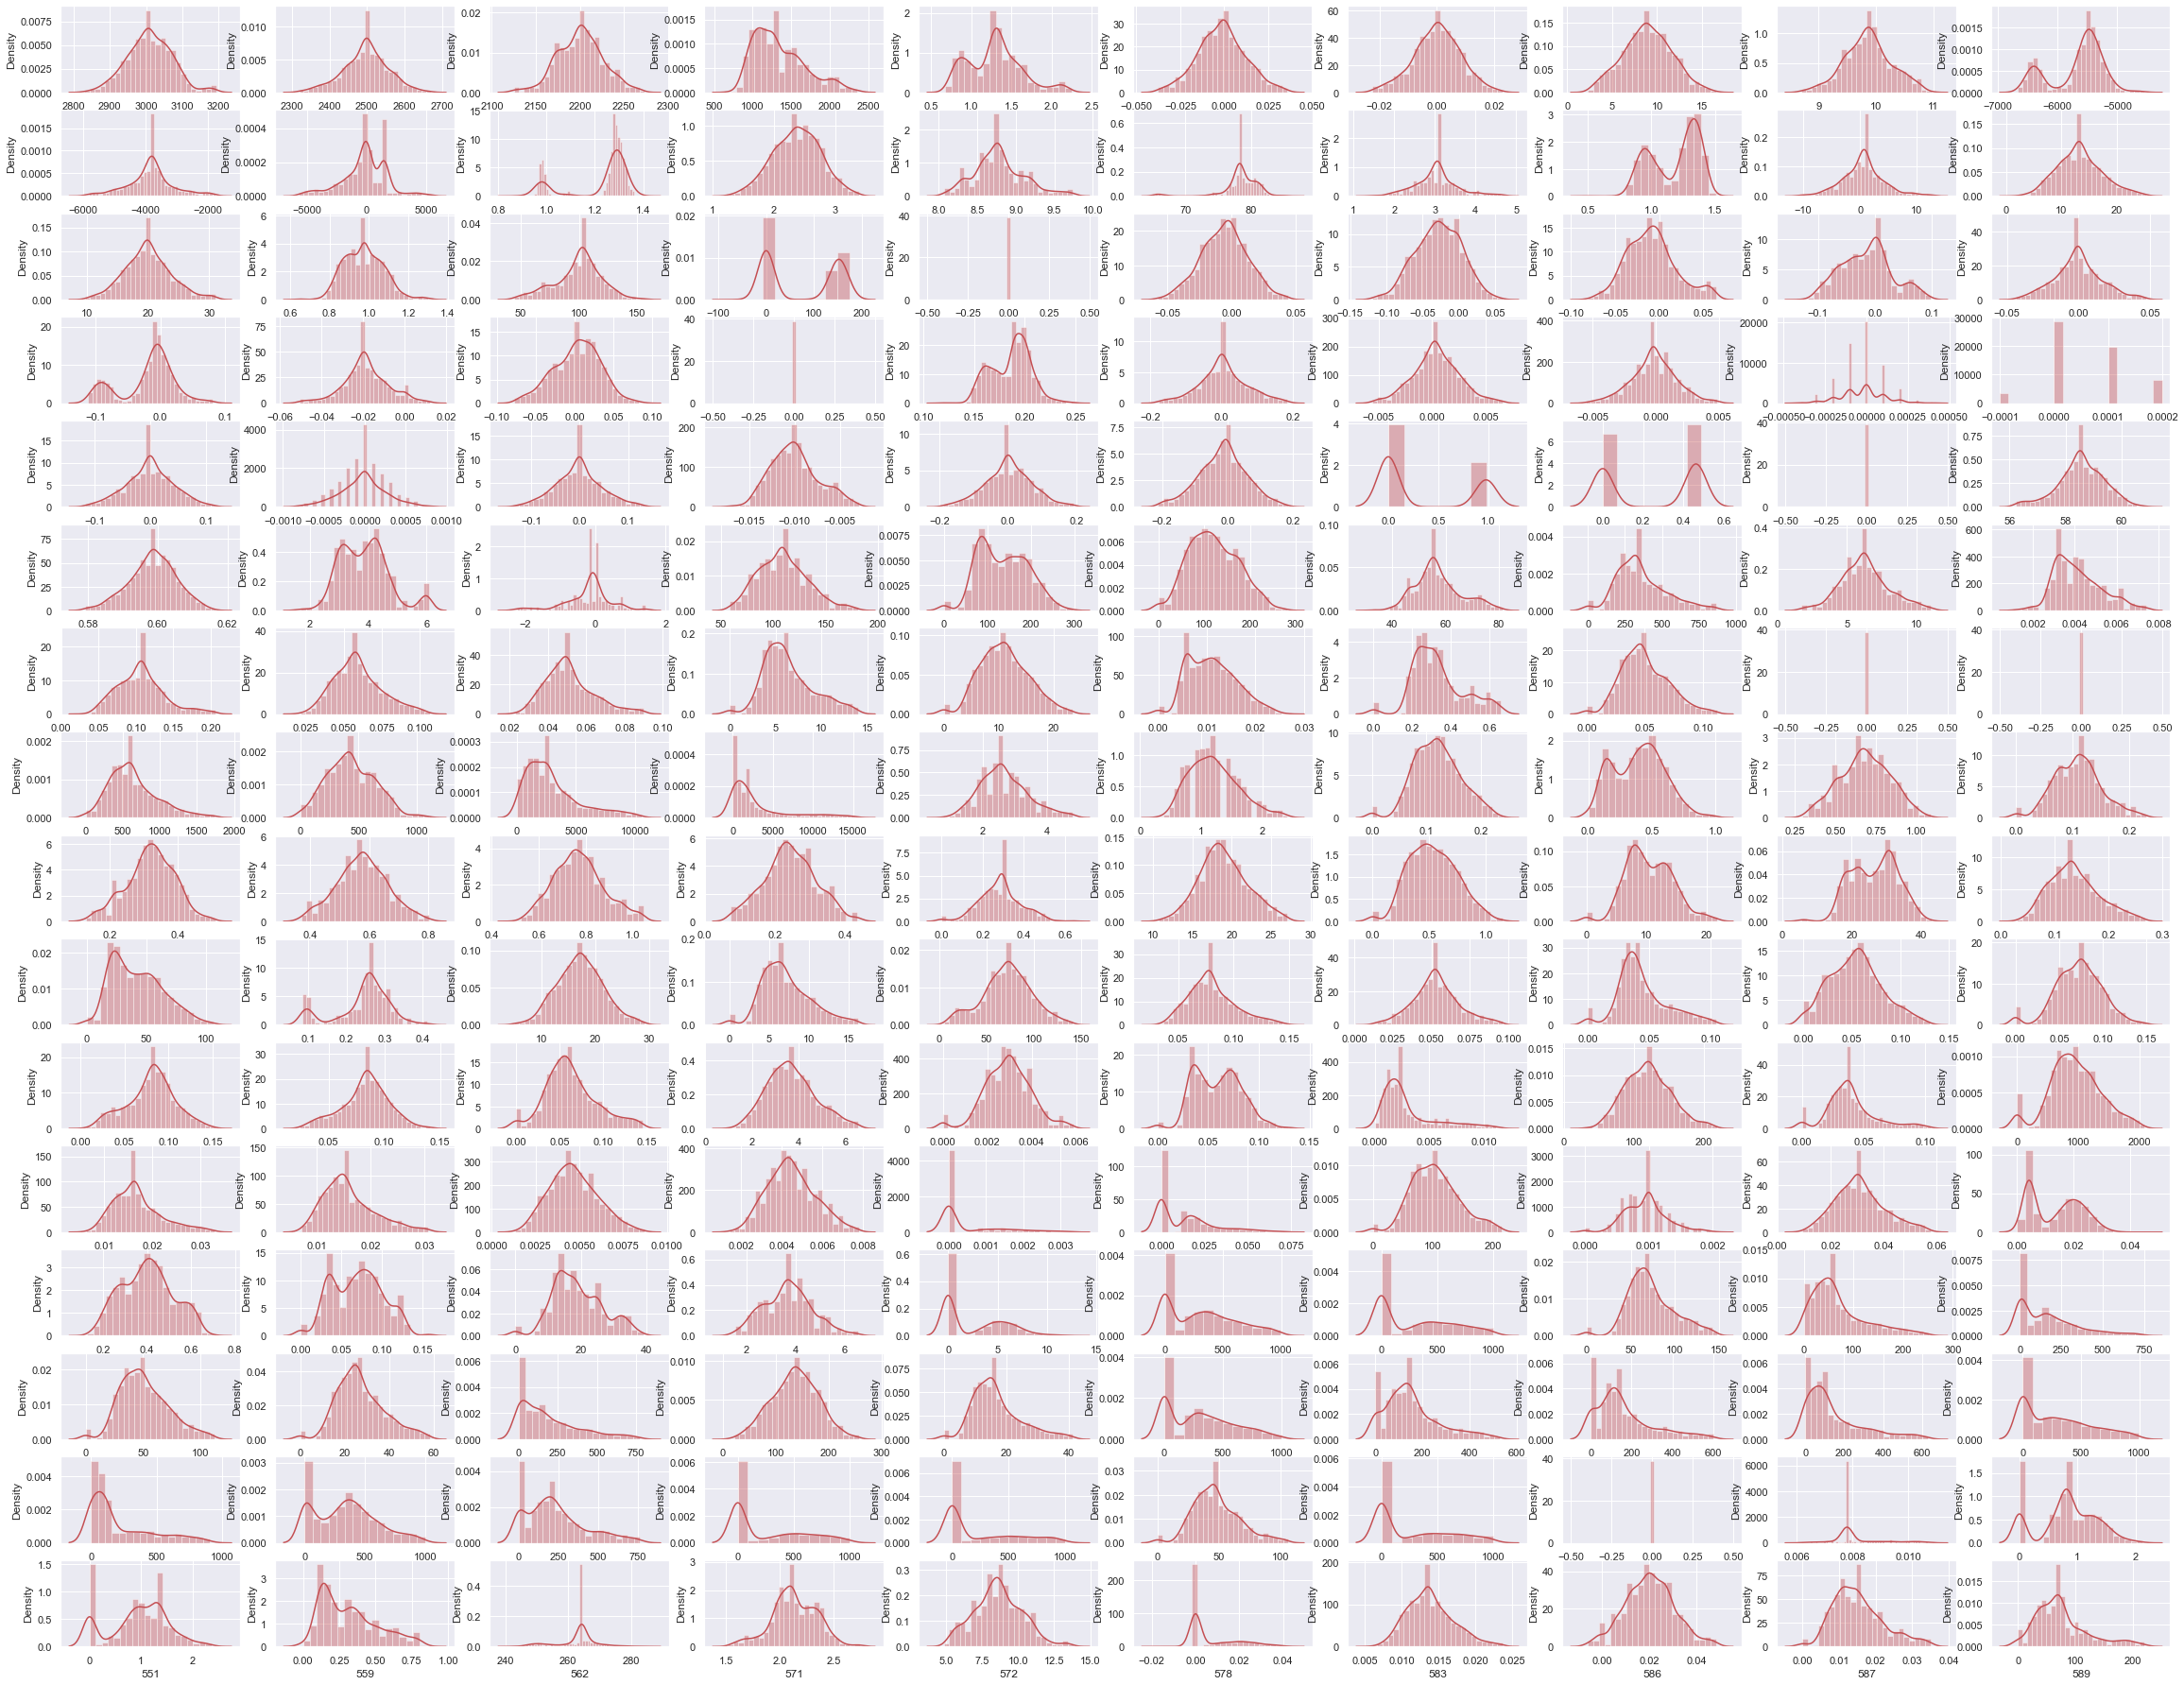

In [127]:
# now we have good set of data as compared to before scenario.

#now, we'll be plotting density plot to check for the distribution of the cols:

plt.figure(figsize=(40, 40))
col = 1
for i in data2.columns:
    plt.subplot(20, 10, col)
    sns.distplot(data2[i], color = 'r')
    col += 1

In [125]:
# we see almost all cols to be normally distributed. :)

In [176]:
#Now, we'll perform scaling of the dataset with z-score
dataScaled= data2.apply(zscore)
dataScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1549.0,9.368017e-15,1.000323,-2.889156,-0.672024,0.015476,0.679396,2.944650
1,1549.0,-2.652064e-15,1.000323,-2.917040,-0.617264,0.027825,0.621461,2.871780
2,1549.0,1.115570e-14,1.000323,-2.900755,-0.712203,-0.000520,0.651128,2.682210
3,1549.0,2.667151e-16,1.000323,-1.897708,-0.782334,-0.187653,0.618599,2.992415
4,1549.0,1.978906e-16,1.000323,-1.845566,-0.837877,0.038531,0.579242,2.840398
8,1549.0,-1.739387e-15,1.000323,-2.898768,-0.715480,-0.030960,0.736366,2.665719
9,1549.0,-3.408076e-17,1.000323,-2.745229,-0.664183,0.010163,0.648253,2.729299
10,1549.0,7.025574e-17,1.000323,-2.770893,-0.647709,0.027850,0.679281,2.754212
11,1549.0,3.093250e-16,1.000323,-2.925532,-0.718630,0.115821,0.719700,2.190968
14,1549.0,2.201796e-16,1.000323,-2.474758,-0.686829,0.001135,0.690767,2.757514


In [177]:
# we see for somerows, we have NaN values present;
# We'll be dropping those NaN values after merging the target field with the scaled data

y=data['Pass/Fail']
comb=pd.concat([dataScaled,y],axis=1)

In [178]:
comb.shape

(1549, 195)

In [179]:
comb['Pass/Fail'].value_counts()

-1.0    1449
 1.0     100
Name: Pass/Fail, dtype: int64

In [180]:
# now, dropping NaN values from dataset
comb.dropna(axis=1,inplace=True)
comb.shape

(1549, 189)

In [184]:
#splitting the dataset into train and validation set
X=comb.iloc[0:1531,:]
val=comb.iloc[1531:,:189]
val=val.drop(['Pass/Fail'],axis=1)

In [189]:
sg=X.copy()
X=sg.drop(['Pass/Fail'],axis=1)
y=sg['Pass/Fail']

In [190]:
# data in training set
X.shape

(1531, 188)

In [191]:
# data in validation set:
val.shape

(18, 188)

### 5. Model training, testing and tuning.
- We'll be trying many different models alongwith many hyper tunings and CV.

In [194]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=10,stratify=y)

In [198]:
Y_train.value_counts()

-1.0    1001
 1.0      70
Name: Pass/Fail, dtype: int64

In [199]:
Y_test.value_counts()

-1.0    430
 1.0     30
Name: Pass/Fail, dtype: int64

In [201]:
# modeling without sampling, on orignal dataset


# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 5.281734% (8.382449%)
KNN: 2.500000% (7.500000%)
GNB: 9.799736% (11.241390%)
SVM: 5.389610% (8.250388%)
DT: 10.322473% (9.702389%)
RF: 0.000000% (0.000000%)
AB: 3.928571% (8.214286%)
GBT: 4.444444% (13.333333%)
XGB: 0.000000% (0.000000%)
LightGBM: 0.000000% (0.000000%)


Observation:
- We implemented many models on the orignal dataset and generated the F1 score,
- Above we see that the model did not perform well without any sampling.

In [211]:
# Using SMOTE to sample data and again model:
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [214]:
print("Failed values (smote)    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("Passed values (smote)    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == -1]), (len(y_SMOTE[y_SMOTE[:] == -1])/len(y_SMOTE)) * 100))

Failed values (smote)    : 500 (33.31%)
Passed values (smote)    : 1001 (66.69%)


In [209]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=25,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 80.111837% (4.288740%)
KNN: 52.308110% (0.600748%)
GNB: 81.784757% (5.993164%)
SVM: 82.451520% (4.090096%)
DT: 82.968214% (5.248200%)
RF: 96.450519% (1.772656%)
AB: 85.022798% (2.523820%)
GBT: 95.328357% (2.247410%)
XGB: 97.034570% (1.632394%)
LightGBM: 97.331952% (1.695635%)


Observation:
- As anticipated, the scores derived after SMOTE sampling produced much better results than before.
- Likewiese, we'll perfom under and over sampling to check which sampling method delivers the best result.

In [215]:
# now performing Undersampling(random):
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, Y_train)

In [216]:
y_under.value_counts()

-1.0    140
 1.0     70
Name: Pass/Fail, dtype: int64

In [217]:
Y_train.value_counts()

-1.0    1001
 1.0      70
Name: Pass/Fail, dtype: int64

In [218]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=66,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 32.555205% (12.805626%)
KNN: 32.674631% (12.484054%)
GNB: 42.729692% (14.538773%)
SVM: 32.924114% (10.453173%)
DT: 40.511707% (4.905538%)
RF: 6.944444% (10.632033%)
AB: 28.805861% (16.137792%)
GBT: 21.645022% (15.796394%)
XGB: 25.167610% (16.897309%)
LightGBM: 26.447497% (16.096853%)


Observation:
- This sampling method did not perform as well as Smote but we have some improvements from the initial No-sampling set.

In [219]:
# now performing Over-sampling(random):
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)

In [220]:
y_over.value_counts()

-1.0    1001
 1.0     500
Name: Pass/Fail, dtype: int64

In [222]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=69,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 80.642575% (3.612480%)
KNN: 84.723355% (2.650230%)
GNB: 65.916516% (5.399830%)
SVM: 84.015274% (2.170632%)
DT: 93.512424% (2.235851%)
RF: 100.000000% (0.000000%)
AB: 91.038496% (2.980337%)
GBT: 98.811293% (1.464814%)
XGB: 99.900990% (0.297030%)
LightGBM: 99.900990% (0.297030%)


Observations:
- This sampling method performed well when compared with under-sampling method.
- for some models, for eg XGB, the model did extremely well producing 99% accuracy.
- while for Random forest, it produced 100%.
- Over-sampling method produced better results than SMOTE

### We'll now perform multiple algotithms on the differntly sampled dataset:

#### GNB on normal dataset:

In [224]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [225]:
modelnb_score = nb.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modelnb_score)

Accuracy Score of Training Data:  0.8524743230625583


In [226]:
y_predictnb= nb.predict(X_test)
modelnb_score = accuracy_score(Y_test, y_predictnb)
print('Accuracy Score of Test Data:', modelnb_score)

Accuracy Score of Test Data: 0.8239130434782609


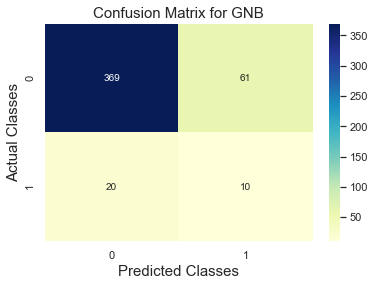

In [228]:
# the model did ok with normal data and gave 82% success rate for the test set:
# confusion matrix:
cm= confusion_matrix(Y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

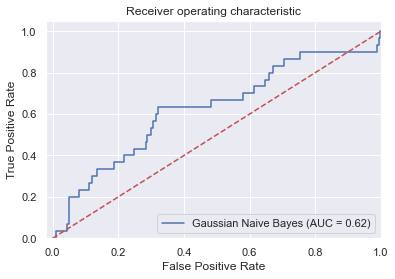

In [229]:
#Plotting ROC and AUC
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### GNB on under-sample data:

In [230]:
nbu = GaussianNB()
nbu.fit(X_under, y_under)

GaussianNB()

In [231]:
modelnbu_score = nbu.score(X_under,y_under)
print('Accuracy Score of Training Data: ', modelnbu_score)

Accuracy Score of Training Data:  0.8571428571428571


In [232]:
y_predictnbu= nbu.predict(X_test)
modelnbu_score = accuracy_score(Y_test, y_predictnbu)
print('Accuracy Score of Test Data:', modelnbu_score)

Accuracy Score of Test Data: 0.7282608695652174


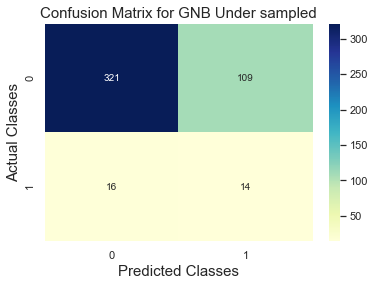

In [234]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

#### GNB model on Over-sampled data:

In [251]:
nbo = GaussianNB()
nbo.fit(X_over, y_over)

GaussianNB()

In [252]:
modelnbo_score = nbo.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelnbo_score)

Accuracy Score of Training Data:  0.7908061292471685


In [253]:
y_predictnbo= nbo.predict(X_test)
modelnbo_score = accuracy_score(Y_test, y_predictnbo)
print('Accuracy Score of Test Data:', modelnbo_score)

Accuracy Score of Test Data: 0.7760869565217391


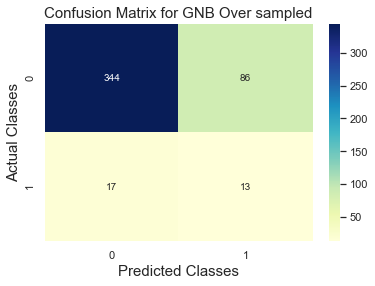

In [243]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnbo)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Over sampled', fontsize = 15);

#### L-GBM on Smote dataset

In [244]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='f1', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    scoring='f1',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_SMOTE, y_SMOTE)
gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'colsample_bytree': 0.952164731370897,
 'min_child_samples': 111,
 'min_child_weight': 0.01,
 'num_leaves': 38,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.3029313662262354}

In [245]:
lgb=LGBMClassifier(colsample_bytree=0.95,
 min_child_samples= 111,
 min_child_weight= 0.01,
 num_leaves= 38,
 reg_alpha= 0,
 reg_lambda= 0.1,
 subsample=0.30)
lgb.fit(X_SMOTE,y_SMOTE)

LGBMClassifier(colsample_bytree=0.95, min_child_samples=111,
               min_child_weight=0.01, num_leaves=38, reg_alpha=0,
               reg_lambda=0.1, subsample=0.3)

In [246]:
modellgb1=lgb.score(X_SMOTE,y_SMOTE)
print('Accuracy Score of Training Data: ', modellgb1)

Accuracy Score of Training Data:  1.0


In [254]:
y_predictlg1= lgb.predict(X_test)
modellg1 = accuracy_score(Y_test, y_predictlg1)
print('Accuracy Score of Test Data:', modellg1)

Accuracy Score of Test Data: 0.9260869565217391


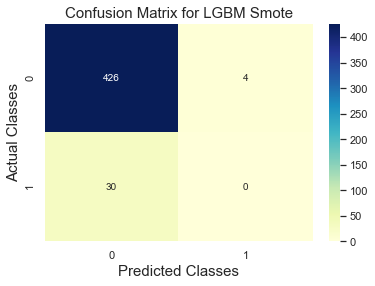

In [256]:
cm= confusion_matrix(Y_test, y_predictlg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM Smote', fontsize = 15);

Observations:
- So far we have generated GBM model for all the datasets we created above.
- For Normal dataset, we got accuracy as 82.5%.
- For Undersample dataset, we got 72.8%
- For Oversampled dataser, we got 77.60%
- For SMOTE dataset, we got 92.60 % making it as best result.

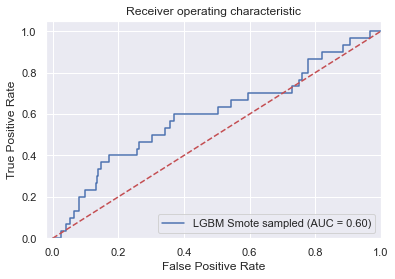

In [259]:
#Plotting ROC and AUC
probs = lgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LGBM Smote sampled (AUC = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random forest on over sampled data:

In [260]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [261]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_over, y_over)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 463,
 'min_samples_split': 82,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': False}

In [262]:

rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_over, y_over)

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_split=82, n_estimators=463)

In [263]:
modelrfg1_score=rf_grid1.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.9986675549633578


In [266]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.9347826086956522


In [268]:
# we have classification report as:
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[1, -1]))

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
          -1       0.93      1.00      0.97       430

    accuracy                           0.93       460
   macro avg       0.47      0.50      0.48       460
weighted avg       0.87      0.93      0.90       460



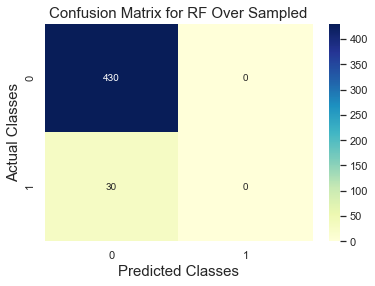

In [269]:
# We have created the RF model, now we visualise it with confusion matrix and heatmap
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);

In [304]:
# Now, we'll apply our models on the validation set:
#making copies of validation dataset
val1=val.copy()
val1=val1.reset_index(drop=True)
val1=pd.DataFrame(val1)
val2=val.copy()
val2=val2.reset_index(drop=True)
val2=pd.DataFrame(val2)
val3=val.copy()
val3=val3.reset_index(drop=True)
val3=pd.DataFrame(val3)
val4=val.copy()
val4=val4.reset_index(drop=True)
val4=pd.DataFrame(val4)

In [300]:
rf_grid1.fit(X_over, y_over)
pred=rf_grid1.predict(val1)
val1['Pass/Fail'] = pred
val1 = val1[(val1['Pass/Fail'] == -1)]
val1.head()

,0,1,2,3,4,8,9,10,11,14,15,16,19,20,21,23,24,25,28,29,31,32,33,36,40,41,43,44,45,47,53,59,60,62,63,64,67,71,72,75,76,77,78,79,80,81,82,83,84,86,87,88,89,91,92,93,94,95,99,100,102,103,107,108,109,112,113,115,116,117,118,119,120,121,122,126,129,130,134,135,136,137,138,139,142,143,144,145,146,150,151,153,155,156,159,160,161,162,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,188,195,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,250,251,253,255,267,268,269,345,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,542,543,544,546,551,558,559,562,565,570,571,572,578,582,583,586,587,589,Pass/Fail
0,2.785848,0.022830,-0.207587,-0.187653,0.900851,-0.694779,-0.482907,-0.080722,0.478148,0.072489,-0.222237,1.236373,0.676356,0.076811,0.388581,0.081721,0.542864,0.656985,1.080526,-0.648000,-0.726016,0.282790,-0.055474,1.228385,0.669533,0.392525,-0.753876,-1.073588,1.717379,-1.627856,2.023141,-1.495373,-0.626001,1.289934,-1.313350,1.310635,-1.337247,-0.149055,-0.973439,0.313813,0.892940,0.299617,0.324141,0.007869,0.462175,1.750926,-0.108726,0.526060,-0.622767,-1.102055,0.285972,-1.901332,-0.301703,0.823461,-0.042303,-0.035884,-1.318723,0.572027,0.166165,0.078938,-2.414402,-0.396699,-0.108499,0.305443,1.354041,-1.07634,-1.597106,0.439900,-1.393793,-0.213361,0.028731,1.165207,-1.823466,-1.065022,1.046282,-1.169610,-1.022970,-1.672308,2.009512,-0.137161,-0.419296,0.091091,-0.141817,1.542660,-0.198336,-1.943282,2.999353,-1.426732,1.286098,-0.393037,0.409055,-0.977238,-1.074286,-1.494213,0.992112,-1.350306,-0.544490,2.074699,1.775973,1.486155,0.673412,-0.150152,0.125295,-1.301442,-0.623497,1.246962,2.155890,0.697966,-1.614013,0.462936,0.278368,-1.179103,0.057015,-1.622603,-1.071297,-0.474250,0.666438,0.428793,0.279471,-0.083392,-0.009328,-2.248148,-2.060704,-2.910379,0.083072,0.071698,-2.207477,-0.417690,-1.301238,-0.822036,0.422937,0.932340,-1.006915,1.068673,-0.764340,0.503147,-0.849591,0.604032,2.971688,-0.857087,1.053324,0.757975,-0.067992,-0.163834,0.507534,-0.905235,0.698957,-0.88251,0.469690,-0.950274,-0.596656,-0.426275,-0.977775,1.624004,-0.967747,-0.146077,2.687077,0.161061,-1.110751,-1.358268,-1.175133,-1.014277,-1.038391,-0.901699,-1.370701,-1.274452,-0.810058,-0.746182,-0.901984,-0.838878,1.083745,2.598126,0.370467,1.168851,0.192220,-0.042675,-0.451356,-1.641669,-0.484546,0.762227,-1.122956,-0.696246,-0.665660,1.103594,-0.689599,0.464203,1.073645,0.268840,-1.0
1,0.998444,-1.501306,-0.207587,-0.187653,0.900851,-2.048638,-0.069599,0.450074,0.544026,0.631201,0.886850,0.223667,0.388265,-1.123120,-0.138964,0.046687,0.061881,0.507073,0.813220,-0.733406,-1.774048,-1.158324,0.525296,1.112567,0.163041,-0.441359,0.890834,2.196246,-0.840840,-0.505702,0.001476,0.683602,1.030990,-0.503931,-1.103839,-0.803269,-0.577757,0.279276,-0.973439,-0.657733,0.589192,-1.639304,-0.300123,0.559779,0.194384,-0.151316,-1.729769,-0.567251,0.244906,-1.399630,0.809275,-2.246944,-0.584142,-1.441538,-0.180644,0.185348,0.192710,-0.675958,0.058788,0.791907,0.112071,0.370738,-1.825780,0.631193,1.357240,-1.07634,0.850650,-0.993875,-1.393793,0.096114,-0.730639,-0.887896,-0.181788,-0.956509,1.269318,-1.070619,-0.578045,-1.937819,1.266207,-0.389843,1.160926,-0.013827,-0.141817,1.542660,-0.198336,-1.943282,2.126782,-1.666359,-0.511085,-0.223680,-0.500783,-0.123898,0.106351,1.599177,-0.309132,1.464741,-0.169625,0.113152,2.309808,1.984003,1.587711,0.475918,0.620606,-0.590536,0.210150,-0.773017,-0.086205,-1.552496,2.129133,0.300223,0.498637,1.329896,-1.586932,2.192082,-0.979527,-2.551901,-1.097541,0.171025,-0.813156,1.025656,-0.365929,-0.789609,-1.636268,0.504772,-0.285149,0.528677,0.260915,-0.896569,1.545248,0.679227,-0.605959,-0.181764,-0.267545,-0.420348,0.678481,-0.550233,-0.632212,0.015893,0.953702,-0.857087,-0.110614,1.076592,0.620927,0.146323,0.470805,-0.880448,0.095173,-0.88251,-1.107439,-0.950274,-0.761516,-0.207747,-0.799576,2.160576,0.786819,0.278023,0.167057,-0.749113,

In [305]:
#fiiting naive bayes on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
pred=nb.predict(val3)
val3['Pass/Fail'] = pred
val3 = val3[(val3['Pass/Fail'] == -1)]
val3.head(18)

,0,1,2,3,4,8,9,10,11,14,15,16,19,20,21,23,24,25,28,29,31,32,33,36,40,41,43,44,45,47,53,59,60,62,63,64,67,71,72,75,76,77,78,79,80,81,82,83,84,86,87,88,89,91,92,93,94,95,99,100,102,103,107,108,109,112,113,115,116,117,118,119,120,121,122,126,129,130,134,135,136,137,138,139,142,143,144,145,146,150,151,153,155,156,159,160,161,162,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,188,195,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,250,251,253,255,267,268,269,345,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,542,543,544,546,551,558,559,562,565,570,571,572,578,582,583,586,587,589,Pass/Fail
0,2.785848,0.022830,-0.207587,-0.187653,0.900851,-0.694779,-0.482907,-0.080722,0.478148,0.072489,-0.222237,1.236373,0.676356,0.076811,0.388581,0.081721,0.542864,0.656985,1.080526,-0.648000,-0.726016,0.282790,-0.055474,1.228385,0.669533,0.392525,-0.753876,-1.073588,1.717379,-1.627856,2.023141,-1.495373,-0.626001,1.289934,-1.313350,1.310635,-1.337247,-0.149055,-0.973439,0.313813,0.892940,0.299617,0.324141,0.007869,0.462175,1.750926,-0.108726,0.526060,-0.622767,-1.102055,0.285972,-1.901332,-0.301703,0.823461,-0.042303,-0.035884,-1.318723,0.572027,0.166165,0.078938,-2.414402,-0.396699,-0.108499,0.305443,1.354041,-1.07634,-1.597106,0.439900,-1.393793,-0.213361,0.028731,1.165207,-1.823466,-1.065022,1.046282,-1.169610,-1.022970,-1.672308,2.009512,-0.137161,-0.419296,0.091091,-0.141817,1.542660,-0.198336,-1.943282,2.999353,-1.426732,1.286098,-0.393037,0.409055,-0.977238,-1.074286,-1.494213,0.992112,-1.350306,-0.544490,2.074699,1.775973,1.486155,0.673412,-0.150152,0.125295,-1.301442,-0.623497,1.246962,2.155890,0.697966,-1.614013,0.462936,0.278368,-1.179103,0.057015,-1.622603,-1.071297,-0.474250,0.666438,0.428793,0.279471,-0.083392,-0.009328,-2.248148,-2.060704,-2.910379,0.083072,0.071698,-2.207477,-0.417690,-1.301238,-0.822036,0.422937,0.932340,-1.006915,1.068673,-0.764340,0.503147,-0.849591,0.604032,2.971688,-0.857087,1.053324,0.757975,-0.067992,-0.163834,0.507534,-0.905235,0.698957,-0.882510,0.469690,-0.950274,-0.596656,-0.426275,-0.977775,1.624004,-0.967747,-0.146077,2.687077,0.161061,-1.110751,-1.358268,-1.175133,-1.014277,-1.038391,-0.901699,-1.370701,-1.274452,-0.810058,-0.746182,-0.901984,-0.838878,1.083745,2.598126,0.370467,1.168851,0.192220,-0.042675,-0.451356,-1.641669,-0.484546,0.762227,-1.122956,-0.696246,-0.665660,1.103594,-0.689599,0.464203,1.073645,0.268840,-1.0
1,0.998444,-1.501306,-0.207587,-0.187653,0.900851,-2.048638,-0.069599,0.450074,0.544026,0.631201,0.886850,0.223667,0.388265,-1.123120,-0.138964,0.046687,0.061881,0.507073,0.813220,-0.733406,-1.774048,-1.158324,0.525296,1.112567,0.163041,-0.441359,0.890834,2.196246,-0.840840,-0.505702,0.001476,0.683602,1.030990,-0.503931,-1.103839,-0.803269,-0.577757,0.279276,-0.973439,-0.657733,0.589192,-1.639304,-0.300123,0.559779,0.194384,-0.151316,-1.729769,-0.567251,0.244906,-1.399630,0.809275,-2.246944,-0.584142,-1.441538,-0.180644,0.185348,0.192710,-0.675958,0.058788,0.791907,0.112071,0.370738,-1.825780,0.631193,1.357240,-1.07634,0.850650,-0.993875,-1.393793,0.096114,-0.730639,-0.887896,-0.181788,-0.956509,1.269318,-1.070619,-0.578045,-1.937819,1.266207,-0.389843,1.160926,-0.013827,-0.141817,1.542660,-0.198336,-1.943282,2.126782,-1.666359,-0.511085,-0.223680,-0.500783,-0.123898,0.106351,1.599177,-0.309132,1.464741,-0.169625,0.113152,2.309808,1.984003,1.587711,0.475918,0.620606,-0.590536,0.210150,-0.773017,-0.086205,-1.552496,2.129133,0.300223,0.498637,1.329896,-1.586932,2.192082,-0.979527,-2.551901,-1.097541,0.171025,-0.813156,1.025656,-0.365929,-0.789609,-1.636268,0.504772,-0.285149,0.528677,0.260915,-0.896569,1.545248,0.679227,-0.605959,-0.181764,-0.267545,-0.420348,0.678481,-0.550233,-0.632212,0.015893,0.953702,-0.857087,-0.110614,1.076592,0.620927,0.146323,0.470805,-0.880448,0.095173,-0.882510,-1.107439,-0.950274,-0.761516,-0.207747,-0.799576,2.160576,0.786819,0.278023,0.167057,-0.74911

#### PCA imlemetation:

- Now, we'll perform PCA and reduce the dimensionality and check the models:

In [333]:
data.shape

(1549, 592)

In [334]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,-0.0367,0.0014,0.9634,196.2746,0.0,8.4061,409.1399,9.8470,0.9701,186.4275,12.5222,1.4208,-5575.25,2755.5,-4149.25,-1533.50,1.3330,1.9803,7.4065,66.2000,2.9556,0.2366,3.3769,85.3498,8.6397,50.6324,64.1999,49.3676,65.3490,86.7217,117.6740,4.138,0.2003,70.0,361.8609,9.9501,143.0718,749.7516,1.2123,141.7482,1.0,646.6809,257.9247,0.0,4.632,4.908,2845.0,0.9231,0.9438,4.5554,0.4836,361.5118,10.2084,123.5555,11.7073,19.5164,26.2174,723.5343,0.9488,149.9064,1.0,634.9736,111.8165,166.6571,468.3165,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,0.0,2.4320,0.9680,1773.5327,0.2140,9242.0100,-0.0142,0.0011,-0.0002,0.0001,0.0002,-0.1808,0.0,0.1452,0.0372,0.0003,0.0001,0.0373,-0.0052,-0.0005,-0.0011,0.0002,0.1023,0.0718,0.0,0.0,0.0,0.0000,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,15.87,15.84,1.045,2.582,0.5323,3.555,-0.4258,0.7785,0.9997,2.3122,1006.4594,38.0592,92.0,63.7,28.9,74.7,416.4299,0.3067,0.0,6.11,0.0053,0.0850,0.0518,0.0612,0.0212,13.7967,0.0,5.292,19.587,0.4062,0.0142,13.4348,0.45,0.0776,0.0,0.0,1036.0,644.0,3818.0,5475.0,0.109,0.066,0.065,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.3962,0.9807,0.1998,0.196,0.0,0.0,22.15,0.426,9.67,20.564,0.1215,4.14,0.0,16.88,52.720,0.0,0.0,0.0,0.0,0.0,0.0,0.270,5.30,20.21,0.440,8.92,17.69,5.30,6.797,21.532,0.1299,5.95,0.0,17.69,82.523,0.0,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,0.0,0.0945,0.0097,200.1670,0.0523,765.2998,0.0,0.0196,0.0158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0053,0.0052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0179,0.0,74.1862,0.0013,2.7930,0.0273,0.0173,0.3696,0.0,0.0,0.0,0.0,0.0,

In [335]:
data.drop(columns='Time', inplace=True)

In [336]:
data.shape

(1549, 591)

In [337]:
cols = data.select_dtypes([np.number]).columns
std = data[cols].std()
cols_to_drop = std[std==0].index
data.drop(cols_to_drop, axis=1,inplace=True)


In [338]:
#label encoding the target class
data['Pass/Fail'] = data['Pass/Fail'].replace([-1,1],[0,1])

In [339]:
data.shape

(1549, 479)

In [340]:
# dividing dataset in:

sg=data.iloc[0:1531,:]
y=sg['Pass/Fail']
sg=sg.drop(['Pass/Fail'],axis=1)
row,column=sg.shape
print('The past dataset contains', row, 'rows and', column, 'columns')

The past dataset contains 1531 rows and 478 columns


In [341]:
val=data.iloc[1531:1549,:]
val=val.drop(['Pass/Fail'],axis=1)
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 18 rows and 478 columns


In [342]:
#scaling with z-score
comScaled= data.apply(zscore)  


#dropping NaN
comScaled.dropna(axis=1,inplace=True)
comScaled=comScaled.drop(['Pass/Fail'],axis=1)

In [344]:
#splitting the dataset into train and validation set

X=comScaled.iloc[0:1531,:]
val=comScaled.iloc[1531:,:]
X.shape,val.shape

((1531, 478), (18, 478))

In [345]:
from sklearn.decomposition import PCA

#extracting componenets that explaint 95% of the variation

pca = PCA(.95)
pca_ = pca.fit_transform(X)
pca

PCA(n_components=0.95)

In [346]:
# now, dataset after PCA
X_pca = pca.transform(X)  
val_pca = pca.transform(val)    

X_pca.shape, val_pca.shape

((1531, 157), (18, 157))

In [347]:
# see the result of PCA:
pca.explained_variance_

array([26.28375873, 18.2192911 , 14.37830229, 12.35999543, 10.17915397,
        9.52844515,  8.69578754,  8.50830149,  8.14881483,  7.46005713,
        7.14376951,  6.85235569,  6.80726065,  6.58886784,  6.30586158,
        6.28438872,  6.06293842,  5.94018834,  5.67756725,  5.4900288 ,
        5.33056348,  5.18954612,  5.15570144,  4.96983485,  4.84090269,
        4.68538097,  4.60725839,  4.5234617 ,  4.4816799 ,  4.31128751,
        4.28839291,  4.18578069,  3.91086465,  3.83323256,  3.72227397,
        3.64099304,  3.61045925,  3.51574791,  3.3859457 ,  3.37162566,
        3.36426974,  3.30663666,  3.25067651,  3.20005991,  3.10646128,
        3.08534748,  3.03750159,  3.00822056,  2.95595199,  2.87127603,
        2.83864105,  2.77207718,  2.72983566,  2.69207245,  2.667214  ,
        2.62888886,  2.58775142,  2.54086986,  2.49757903,  2.43112807,
        2.41271007,  2.35471782,  2.3185257 ,  2.25584864,  2.2435622 ,
        2.23255336,  2.17357531,  2.15104618,  2.11865249,  2.09

In [348]:
#creating a dataframe of the componenets and attaching it to the target class
pca_df = pd.DataFrame(data = X_pca)
df=pd.concat([pca_df,y],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,Pass/Fail
0,-0.664037,1.497583,2.195348,0.449351,-2.536626,-0.804518,-0.309363,0.835272,-1.515752,-2.365147,0.129020,-1.023910,-1.858166,1.152450,-1.444986,-0.972750,-0.966522,0.766142,1.511319,1.486243,1.783644,-1.576634,1.475627,-2.486638,0.719560,1.828321,-1.019880,0.099138,-0.188625,-1.998663,-1.712403,2.749420,-0.459289,-0.687797,0.241893,-1.833351,1.324892,1.591334,0.768541,-0.756820,1.020674,-2.548141,-2.487975,-1.451044,1.575379,0.488789,-1.132484,0.873487,0.362113,-1.467839,-0.665512,0.428611,1.264798,0.533749,-1.343122,0.692458,-0.407242,0.517838,2.108253,0.683573,0.736458,2.114661,-0.331352,1.356292,-0.276541,0.133938,-0.240879,2.001255,-0.809908,0.664306,1.993717,-0.045288,1.921182,1.761720,0.371760,1.076875,0.521553,-1.845142,0.695251,-1.197313,-0.227486,0.032780,-1.565882,-0.871869,0.335885,-0.105477,0.102800,0.228738,0.210281,0.391105,-1.565370,-0.377737,1.358557,-0.569189,-0.547936,1.323906,0.208730,1.068311,0.598869,0.337898,0.166977,0.287285,0.494481,0.408715,-0.811014,0.843324,-0.149911,0.576878,-1.722078,-0.607624,-0.512833,0.011073,-1.382956,-0.783802,-0.913489,-0.515164,-0.969466,0.707242,-0.809646,-0.527618,-0.991752,-0.176254,0.424797,1.905290,-0.033951,-0.516829,0.649813,-0.347726,2.239640,-0.535588,1.502140,0.319887,-0.062553,0.248022,-1.153899,1.325739,0.752042,-0.501767,-0.098275,2.011013,-1.024112,0.388603,0.420174,0.169156,-0.898207,-0.338918,-0.606005,-0.267336,0.847885,-0.745035,-0.658034,-0.633363,0.113052,0.373960,-0.262903,-0.694513,0.037370,0.0
1,1.243857,4.603622,2.499549,0.446014,-0.241413,-0.172353,-2.265490,2.171899,3.342667,1.867921,0.054810,-3.345475,0.353159,-0.566092,-0.543903,1.087096,-0.911514,-1.368976,-1.333765,1.582426,3.947044,1.795302,-1.301616,0.302610,1.673828,-2.664854,0.637646,-0.290527,0.239287,-1.900454,-1.724187,-0.631560,0.253014,-3.143321,1.485424,-2.418780,0.099272,0.878900,-2.377151,0.391731,3.295090,-2.320453,-0.007916,0.544800,0.678468,-1.362283,2.873605,-0.141836,-0.377249,0.861251,1.629737,-0.046619,0.364657,3.460490,-0.259214,-0.956318,0.523064,1.717204,2.169044,0.494784,-0.451516,2.509984,1.712772,-0.309741,1.196454,1.235670,-0.081964,1.035223,-1.577551,1.556687,2.773770,-3.514190,2.100002,2.019814,0.846591,0.536217,1.554327,0.378017,-1.638557,-0.290998,-1.150282,0.177583,1.254368,0.375617,-0.908108,0.199597,-1.252961,-2.325153,-0.092527,0.274904,-0.591594,-0.346865,-0.522208,0.350851,-1.464443,-1.144424,0.328209,-0.545057,0.585002,-1.730591,-0.633037,-1.012841,-0.287752,0.634409,0.204948,-1.576896,-0.888022,-0.748511,-0.208912,1.751434,-0.820620,-0.925903,0.369174,0.895330,-0.419834,0.540610,-0.673187,-0.339316,-0.837923,-0.714090,0.483247,1.452296,-0.800848,-1.041632,0.171131,-0.916477,0.663589,-0.644714,0.136554,0.028401,-0.094816,-0.958093,-1.005447,-1.324351,-1.349518,0.245563,0.434449,-1.581377,1.366153,-0.347829,-0.629704,-0.892713,2.105317,0.180839,0.127935,2.478633,-0.455175,-0.166791,-0.518874,0.797253,1.069455,0.161513,0.657467,-0.956415,0.811968,-0.918585,2.092529,0.0
2,0.152239,-0.630378,2.307309,-0.265246,3.404795,0.703007,-0.110069,-2.367948,-0.629032,1.576126,3.445283,2.884637,-2.246337,-3.536474,0.826089,-2.867495,-2.359074,1.630846,-1.578504,1.021276,-0.162113,8.711491,1.022184,-4.149939,4.732887,-4.527545,-0.259503,-1.997251,0.239076,-1.133707,-3.814302,1.438297,-2.707553,-2.160619,0.336789,-4.600605,0.917866,1.006235,1.378664,-2.740835,1.366272,-4.314246,2.262951,-4.285344,1.207932,-0.574182,-0.089978,-0.368902,-0.100966,-0.243037,

### We'll now be performing various sampling tech on the PCA dataset:

In [349]:
X=df.drop(['Pass/Fail'],axis=1)
y=df['Pass/Fail']

In [350]:
# splitting data into training and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)

In [351]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Fail    : 70 (6.54%)
Training Pass  : 1001 (93.46%)

Test Fail        : 30 (6.52%)
Test Pass       : 430 (93.48%)



In [352]:
# implementing varios models:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 7.913420% (8.011063%)
KNN: 2.222222% (6.666667%)
GNB: 7.303030% (8.975479%)
SVM: 7.210084% (7.517491%)
DT: 7.215007% (7.387265%)
RF: 0.000000% (0.000000%)
AB: 3.636364% (7.272727%)
GBT: 2.222222% (6.666667%)
XGB: 0.000000% (0.000000%)
LightGBM: 0.000000% (0.000000%)


In [354]:
# Performing SMOTE: (as it gave best result lasttime)
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [355]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 500 (33.31%)
SMOTE Training Pass  : 1001 (66.69%)


In [356]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=87,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 77.287330% (5.283921%)
KNN: 62.545751% (1.697702%)
GNB: 75.698755% (4.275978%)
SVM: 79.225845% (4.376618%)
DT: 75.495850% (3.453094%)
RF: 94.945571% (3.696546%)
AB: 82.709226% (3.470280%)
GBT: 94.543210% (2.454741%)
XGB: 97.870045% (1.610020%)
LightGBM: 97.845154% (2.089437%)


Observations:
- So far, we have covered all the Sampling and PCA techniquies in he worksheet.
- We have created multiple models onthe split data and made varios tests.
- Generally, SMOTE gave much better result than other sampling methods.
- On an unseen data Random Forest without PCA ,using random oversampling would give an accuracy of between 96.9% to 99.6%, almost all the time.
- Afetr PCA, the results were better than before.

### Conclusion:

- Based on the overall analysis and performances of the model we can go ahead and narrow down the observation that are common to the all the validations sets and infer that these are likely to fail. 
- The dataset was in much need of cleaning.
- It seems that some of the dataset were removed incorrectly from the actual dataset, whoch inturn made us make more assumptions.
- We had to manually delete data.
- data division should have been beteer for calss.
